In [1]:
from bs4 import BeautifulSoup
import requests

In [2]:
import openpyxl
excel=openpyxl.Workbook()
sheet=excel.active
sheet.title='Scraped Data USA Senate'
sheet.append(['Person_Name','State_Name','Party_Name','Vote'])
try:
    source=requests.get("https://www.senate.gov/legislative/LIS/roll_call_votes/vote1171/vote_117_1_00094.htm#state")
    source.raise_for_status()
    soup=BeautifulSoup(source.text,'html.parser')
    lists=soup.find_all('div',class_="contenttext")
    names=soup.find_all('div',class_="contenttext responsive_col")
    i=0
    while i<150 :
        k=2
        j=i+1
        while k>0:
            State_name=names[i].text.split(':')[0].strip()
            Vote=names[j].text.split(',')[1].strip()
            Person_Name=names[j].text.split(',')[0].split('(')[0].strip()
            Party_Name=names[j].text.split(',')[0].split('(')[1].split('-')[0].strip()
            sheet.append([Person_Name,State_name,Party_Name,Vote])
            k=k-1
            j=j+1
        i=i+3
    #for name in names:
     #   State_Name=name.b.text
     #   if len(State)!=3 and State!="Not Voting":




except Exception as e:
    print(e)
excel.save('USA Senate Scraped Data.xlsx')

In [3]:
import pandas as pd
ans={}

In [9]:
from google.colab import files
uploaded = files.upload()



Saving USA Senate Scraped Data.xlsx to USA Senate Scraped Data (1).xlsx


In [10]:
import pandas as pd
df = pd.read_excel("USA Senate Scraped Data.xlsx")


In [11]:
df

,Person_Name,State_Name,Party_Name,Vote
0,Shelby,Alabama,R,Yea
1,Tuberville,Alabama,R,Yea
2,Murkowski,Alaska,R,Yea
3,Sullivan,Alaska,R,Not Voting
4,Kelly,Arizona,D,Nay
...,...,...,...,...
95,Manchin,West Virginia,D,Yea
96,Baldwin,Wisconsin,D,Nay
97,Johnson,Wisconsin,R,Yea
98,Barrasso,Wyoming,R,Yea


In [12]:
#Q.1 How many democrats did not vote?
res=df[df['Party_Name']=='D']['Vote']
cnt=0
for i in res:
    if i=='Not Voting':
        cnt=cnt+1
print(cnt)
ans[1]=cnt

0


In [13]:
#Q.2 How many republicans voted Yea?
ans[2]=df[df['Party_Name']=='R']['Vote'].value_counts()[0]
print(ans[2])

49


/tmp/ipython-input-13-3446396955.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ans[2]=df[df['Party_Name']=='R']['Vote'].value_counts()[0]


In [14]:
#Q.3 What's the total number of Yea votes from all senators whose name starts with "B"?
ans=(df[df['Vote']=="Yea"]['Person_Name'])
cnt=0
for i in ans:
    if i[0]=='B':
        cnt=cnt+1
print(cnt)
ans[3]=cnt

6


/tmp/ipython-input-14-4221474415.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ans[3]=cnt


In [15]:
#Q.4 How many states voted all Yay?
Res=((df[df['Vote']=="Yea"]['State_Name']))
res=(len(set(Res)))
print(res)
ans[4]=res

29


/tmp/ipython-input-15-2458915002.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ans[4]=res
/tmp/ipython-input-15-2458915002.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ans[4]=res


In [16]:
#Q.5 How many states had at least 1 non-voting senator?
ans[5]=df['Vote'].value_counts()[2]

/tmp/ipython-input-16-325077420.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ans[5]=df['Vote'].value_counts()[2]
/tmp/ipython-input-16-325077420.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ans[5]=df['Vote'].value_counts()[2]
/tmp/ipython-input-16-325077420.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ans[5]=df['Vote'].value_counts()[2]


In [17]:
#Q.6 How many states have both Republican senators?
lists=df[df['Party_Name']=='R']['State_Name']
dic={}
cnt=0
for i in lists:
    if i  in dic.keys():
        dic[i]=dic[i]+1
    else:
        dic[i]=1
for i,j in dic.items():
    if j==2:
        cnt=cnt+1
print(cnt)

ans[6]=cnt

22


/tmp/ipython-input-17-393673397.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ans[6]=cnt


In [18]:
#Q.7 How many states have both Republican and Democrat senators?
ans[7]=(pd.get_dummies(df,columns=['Party_Name']).groupby(['State_Name']).sum()).query('Party_Name_R == 1 & Party_Name_D == 1').shape[0]

In [19]:
#Q.8 How many Senators have their names starting with W?
res=df['Person_Name']
cnt=0
for i in res:
    if i[0][0]=='W':
        cnt=cnt+1
print(cnt)
ans[8]=cnt

6


/tmp/ipython-input-19-3788976577.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ans[8]=cnt
/tmp/ipython-input-19-3788976577.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ans[8]=cnt


In [20]:
#Q.9 What is the votes ratio of Democrats' major decision to Republican's major decision ?
major_decision = pd.crosstab(df['Party_Name'],df['Vote']).max(axis = 1).loc[['D','R']].values
ans[9]=round(major_decision[0] / major_decision[1],4)

/tmp/ipython-input-20-3897369906.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ans[9]=round(major_decision[0] / major_decision[1],4)
/tmp/ipython-input-20-3897369906.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ans[9]=round(major_decision[0] / major_decision[1],4)


In [22]:
import numpy as np
nayyea = pd.crosstab(df['Party_Name'], df['Vote']).astype(float)
ph = abs(nayyea.Yea - nayyea.Nay) / nayyea.Yea

maximum = 0
for i in ph:
    if i not in [np.nan, np.inf] and i > maximum:
        maximum = i

ans[10] = str(round(maximum, 4) * 100) + '%'


/tmp/ipython-input-22-2978316250.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ans[10] = str(round(maximum, 4) * 100) + '%'
/tmp/ipython-input-22-2978316250.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ans[10] = str(round(maximum, 4) * 100) + '%'


In [23]:
#Q.11 How many Democrats voted Yea?
res=df[df['Party_Name']=='D']['Vote'].value_counts()[1]
print(res)
ans[11]=res

3


/tmp/ipython-input-23-3091492577.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  res=df[df['Party_Name']=='D']['Vote'].value_counts()[1]
/tmp/ipython-input-23-3091492577.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ans[11]=res
/tmp/ipython-input-23-3091492577.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ans[11]=res


In [24]:
 #Q.12 How many states voted all Nay?
tns=set(df[df['Vote']=='Nay']['State_Name'])
rem=(len(tns))
print(rem)
ans[12]=rem

26


/tmp/ipython-input-24-1273040421.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ans[12]=rem
/tmp/ipython-input-24-1273040421.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ans[12]=rem


In [25]:
# Q.13 How many states have both Democrat senators?
lists=df[df['Party_Name']=='D']['State_Name']
dic={}
cnt=0
for i in lists:
    if i  in dic.keys():
        dic[i]=dic[i]+1
    else:
        dic[i]=1
for i,j in dic.items():
    if j==2:
        cnt=cnt+1
print(cnt)
ans[13]=cnt

21


/tmp/ipython-input-25-2641107224.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ans[13]=cnt
/tmp/ipython-input-25-2641107224.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ans[13]=cnt


In [26]:
#Q.14 How many senators did not vote?
res=df['Vote'].value_counts()[2]
print(res)
ans[14]=res

1


/tmp/ipython-input-26-2981911789.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  res=df['Vote'].value_counts()[2]
/tmp/ipython-input-26-2981911789.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ans[14]=res
/tmp/ipython-input-26-2981911789.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ans[14]=res


In [27]:
#Q.15 How many states had at least 1 senator not voted?
res=df['Vote'].value_counts()[2]
print(res)
ans[15]=res

1


/tmp/ipython-input-27-112922971.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  res=df['Vote'].value_counts()[2]
/tmp/ipython-input-27-112922971.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ans[15]=res
/tmp/ipython-input-27-112922971.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ans[15]=res


In [28]:
#Q.16 Ratio of number of rows to the number of columns in your dataset?
ratio=df.shape[0]/df.shape[1]
print(ratio)
ans[16]=ratio

25.0


/tmp/ipython-input-28-1888344127.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ans[16]=ratio


In [29]:
import csv

answers = []
for i in range(1,17):
    answers.append(['Q'+str(i),ans[i]])


filename = "TDS_PROJECT-1.csv"

with open(filename, 'w',newline='') as csvfile:
    csvwriter = csv.writer(csvfile,dialect='excel')
    csvwriter.writerows(answers)

In [30]:
import pandas as pd
df=pd.read_excel("USA Senate Scraped Data.xlsx")
df

,Person_Name,State_Name,Party_Name,Vote
0,Shelby,Alabama,R,Yea
1,Tuberville,Alabama,R,Yea
2,Murkowski,Alaska,R,Yea
3,Sullivan,Alaska,R,Not Voting
4,Kelly,Arizona,D,Nay
...,...,...,...,...
95,Manchin,West Virginia,D,Yea
96,Baldwin,Wisconsin,D,Nay
97,Johnson,Wisconsin,R,Yea
98,Barrasso,Wyoming,R,Yea


In [31]:
import matplotlib.pyplot as plt

# create data
x = ['D','R']
df[df['Party_Name']=='D']['Vote'].value_counts()

,count
Vote,
Nay,45
Yea,3


In [32]:
df[df['Party_Name']=='R']['Vote'].value_counts()

,count
Vote,
Yea,49
Not Voting,1


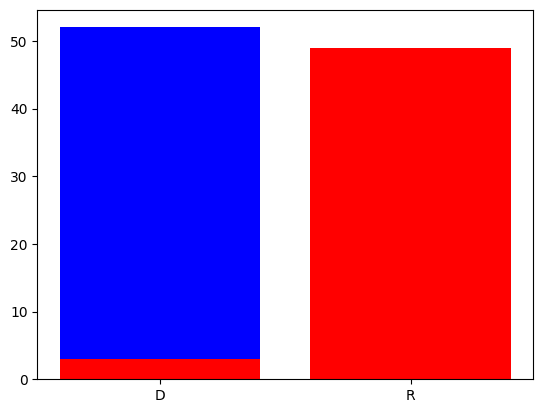

In [33]:
y1 = [3, 49]
y2 = [49, 0]
plt.bar(x, y1, color='r')
plt.bar(x, y2, bottom=y1, color='b')
plt.show()

Text(0, 0.5, 'No_of_Votes')

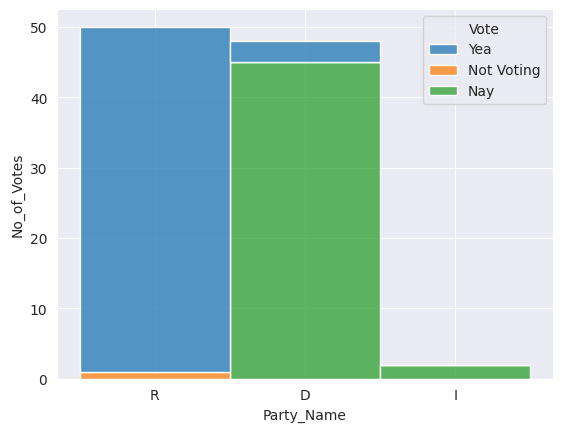

In [34]:
import seaborn as sns
sns.set_style(style='darkgrid')
sns.histplot(x='Party_Name',hue='Vote',multiple='stack',data=df)
plt.ylabel('No_of_Votes')

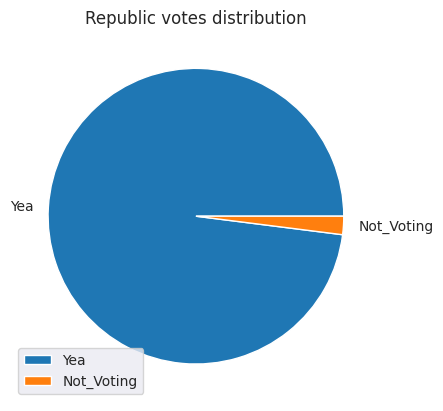

In [35]:
import matplotlib.pyplot as plt
import numpy as np

y = np.array([49,1])
mylabels = ["Yea","Not_Voting"]

plt.pie(y, labels = mylabels)
plt.title('Republic votes distribution')
plt.legend()
plt.show()

In [36]:
crosstable=pd.crosstab(df['Party_Name'],df['Vote'])
crosstable

Vote,Nay,Not Voting,Yea
Party_Name,,,
D,45,0,3
I,2,0,0
R,0,1,49


In [37]:
crosstable.style.background_gradient(cmap='viridis')

Vote,Nay,Not Voting,Yea
Party_Name,,,
D,45,0,3
I,2,0,0
R,0,1,49


<Axes: xlabel='Vote', ylabel='Party_Name'>

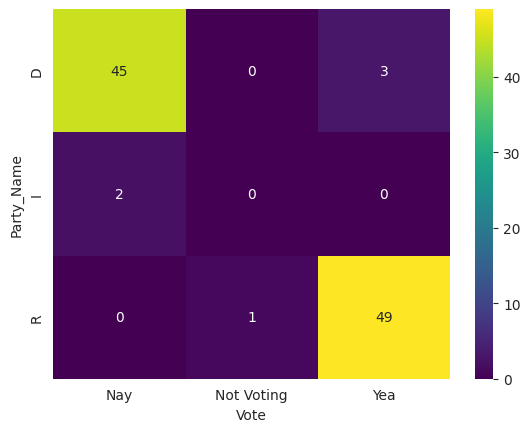

In [38]:
sns.heatmap(crosstable,annot=True,cmap='viridis')

In [39]:
df

,Person_Name,State_Name,Party_Name,Vote
0,Shelby,Alabama,R,Yea
1,Tuberville,Alabama,R,Yea
2,Murkowski,Alaska,R,Yea
3,Sullivan,Alaska,R,Not Voting
4,Kelly,Arizona,D,Nay
...,...,...,...,...
95,Manchin,West Virginia,D,Yea
96,Baldwin,Wisconsin,D,Nay
97,Johnson,Wisconsin,R,Yea
98,Barrasso,Wyoming,R,Yea


In [40]:
lists=df[df['Party_Name']=='D']['State_Name']
dic={}
cnt1=0
for i in lists:
    if i  in dic.keys():
        dic[i]=dic[i]+1
    else:
        dic[i]=1
for i,j in dic.items():
    if j==2:
        cnt1=cnt1+1
print("Democratic Dominition:",cnt1)
lists=df[df['Party_Name']=='R']['State_Name']
dic={}
cnt2=0
for i in lists:
    if i  in dic.keys():
        dic[i]=dic[i]+1
    else:
        dic[i]=1
for i,j in dic.items():
    if j==2:
        cnt2=cnt2+1

print("Republic Dominition:",cnt2)

Democratic Dominition: 21
Republic Dominition: 22


In [41]:
res=len(set(df['State_Name']))
print(res-cnt1-cnt2)

7


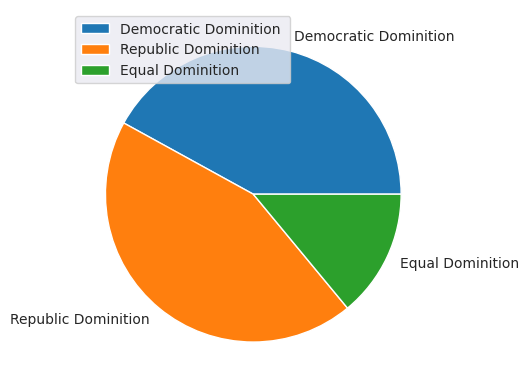

In [42]:
import matplotlib.pyplot as plt
import numpy as np

y = np.array([21, 22, 7])
mylabels = ["Democratic Dominition ", "Republic Dominition", "Equal Dominition"]

plt.pie(y, labels = mylabels)
plt.legend()
plt.show()

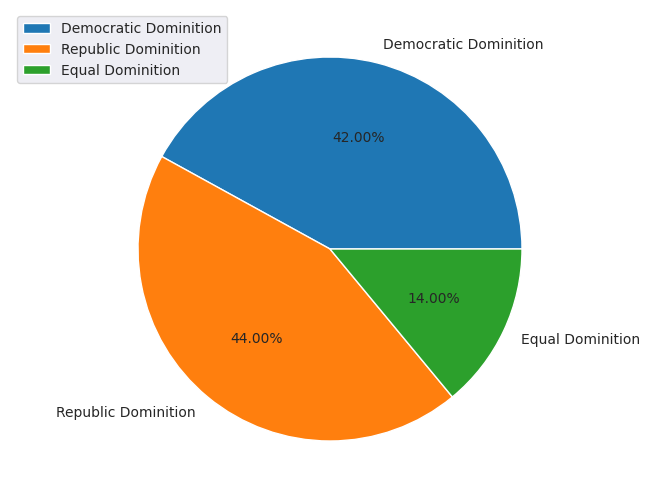

In [43]:
from matplotlib import pyplot as plt
import numpy as np
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
langs = ['Democratic Dominition', 'Republic Dominition', 'Equal Dominition']
students = [21,22,7]
ax.pie(students, labels = langs,autopct='%1.2f%%')
plt.legend()
plt.show()